# Baseline: Moving Average as a Prediction

In this notebook, we define a benchmark to compare all future modeling results against. We'll simply use a three-day moving average of fantasy performance to predict the next game for each of our players. This is a classic and simple time series technique that more advanced modeling solutions should be able to outperform.

#### Setup

In [23]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('ggplot')

In [27]:
def get_naive_predictions(df, split_date, player_name):
    df_cp = df.copy()
    df_cp['pred'] = df_cp['target'].rolling(3).mean().shift()
    df_cp['date'] = pd.to_datetime(df_cp['date'])
    
    preds = df_cp.loc[df_cp['date']>split_date]['pred']
    y_test = df_cp.loc[df_cp['date']>split_date]['target']
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print('{}'.format(player_name))
    print("RMSE: {:.2f}\n MAE: {:.2f}".format(rmse, mae))
    
    fig, ax = plt.subplots()
    plot1 = ax.plot(y_test, alpha = 0.8, label='actual')
    plot2 = ax.plot(preds, alpha = 0.8, label='predicted')
    ax.legend()
    plt.xlabel('Game Number')
    plt.ylabel('Fantasy Points')
    plt.title('{} Fantasy Points 2012, Predicted vs Actual'.format(player_name))
    plt.show()

#### Tom Brady

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys


Tom Brady
RMSE: 7.31
 MAE: 6.25


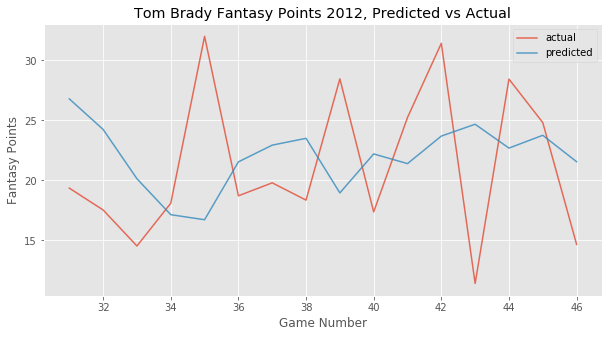

In [28]:
plt.rcParams['figure.figsize'] = (10, 5)
split_date = dt.date(2012,5,1)
brady = pd.read_csv('../data/data_final/final/features_raw/brady.csv')

get_naive_predictions(brady, split_date, 'Tom Brady')

#### LeSean McCoy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys


LeSean McCoy
RMSE: 3.33
 MAE: 2.88


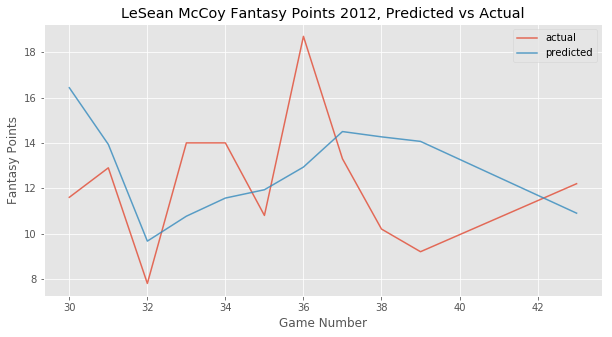

In [29]:
mccoy =  pd.read_csv('../data/data_final/final/features_raw/mccoy.csv')
mccoy = mccoy.loc[mccoy['target']!=0]

x=get_naive_predictions(mccoy, split_date, 'LeSean McCoy')

In [30]:
mccoy.tail()

,target,date,player_home,player_played,betting_over_under_line,weather_temperature,weather_wind_mph,weather_humidity,defense_fumbles_forced_moving_avg_1,defense_fumbles_forced_moving_max_1,...,twitter_count_player_swing_1_3,twitter_count_opponent_swing_1_3,twitter_player_net_sentiment,twitter_opponent_net_sentiment,twitter_player_pct_neutral,twitter_opponent_pct_neutral,twitter_net_sentiment_player_swing_1_3,twitter_net_sentiment_opponent_swing_1_3,twitter_pct_neutral_player_swing_1_3,twitter_pct_neutral_opponent_swing_1_3
36,18.7,10/28/12,1,1,43.0,58,13,75.0,2,2,...,0.919231,0.335135,-0.202627,-0.277666,0.439024,0.227017,-0.683274,-0.407407,0.048012,-0.250000
37,13.3,11/5/12,0,1,52.0,72,0,NaN,1,1,...,0.135211,-0.378277,-0.290765,-0.219420,0.409091,0.232323,-0.620553,-1.366848,-0.127063,-0.281159
38,10.2,11/11/12,1,1,44.5,63,7,45.0,0,0,...,0.405028,0.248485,-0.125000,-0.224034,0.414804,0.371508,-3.872414,-0.606268,-0.349431,0.069801
39,9.2,11/18/12,0,1,46.0,52,9,55.0,0,0,...,0.592593,0.201299,-0.215357,-0.281947,0.442189,0.164166,-0.279796,0.694024,-0.075842,-0.174371
43,12.2,12/23/12,1,1,46.0,44,9,52.0,0,0,...,-0.538462,-0.463668,-0.263380,-0.298077,0.421127,0.457746,-0.330738,-0.197157,0.017544,0.024723


In [ ]:
i